# Torturial on Interpreter class

Torturial on how to utilize Interpreter class in Interpreter.py

In [1]:
import torch
from torch import nn

device = torch.device('cpu' if not torch.cuda.is_available() else 'cuda')

# Suppose the input is x
x = torch.randn(5,256) / 10
x = x.to(device)
words = ['1','2','3','4','5']

# We use a linear function as our example of Phi
# Phi = 10 * word[0] + 20 * word[1] + 5 * word[2] - 20 * word[3] - 10 * word[4]
def Phi(x):
    W = torch.tensor([10., 20., 5., -20., -10.]).to(device)
    return W @ x

In [2]:
# We use Interpreter to explain the model
from Interpreter import Interpreter

interpreter = Interpreter(x=x, Phi=Phi, words=words)
interpreter.to(device)

Interpreter()

In [3]:
# Train the interpreter by optimizing the loss
interpreter.optimize(iteration=5000, lr=0.01, show_progress=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:06<00:00, 800.13it/s]


show the sigma we have got

In [4]:
interpreter.get_sigma()

array([0.03405075, 0.01726185, 0.06955848, 0.01850361, 0.03410182],
      dtype=float32)

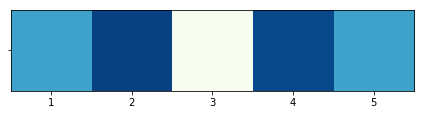

In [5]:
# Visualize the information loss of our sigma
interpreter.visualize()

We can see that the second and forth words are important to ${\bf s} = \Phi({\bf x})$, which is reasonable because the weights of them are larger.